In [1]:

#Importing libs

import numpy as np
import os
import glob
import cv2
%matplotlib widget
import matplotlib.pyplot as plt


In [2]:

def load_data(path):

    # Get a list of all the folders in the directory
    folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

    folders.sort()

    # Print the list of folders
    print("Folders = ", folders)

    data   = tuple()
    labels = tuple()

    for folder in folders:
        # Get a list of all the image files in the directory (supported file extensions: .jpg, .jpeg, .png, .bmp, .gif, .tiff)
        images_path = glob.glob(os.path.join(path + "/" + folder, '*.jpg'))


        # By default, the color space of the loaded image is BGR (blue, green, red)
        # rather than the typical RGB (red, green, blue) order.
        bgr_images = tuple(cv2.imread(image_path) for image_path in images_path)

        # Conversion of image from BGR (128, 128, 3) to greyscale(128, 128)
        gray_images = tuple(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in bgr_images)

        # Conversion of image from 2d matrix (128, 128) to 1d matrix (128 * 128, )
        images = tuple(image.ravel() for image in gray_images)

        data   += images
        labels += tuple(folder * len(images))


    return np.array(data), np.array(labels)


# images, labels = load_data()

In [3]:
# Load Dataset
# DATASET_PATH = 'Dataset/Indian/'
DATASET_PATH = 'Miniset'

images, labels = load_data(DATASET_PATH)


Folders =  ['1', '2', 'A', 'B', 'C']


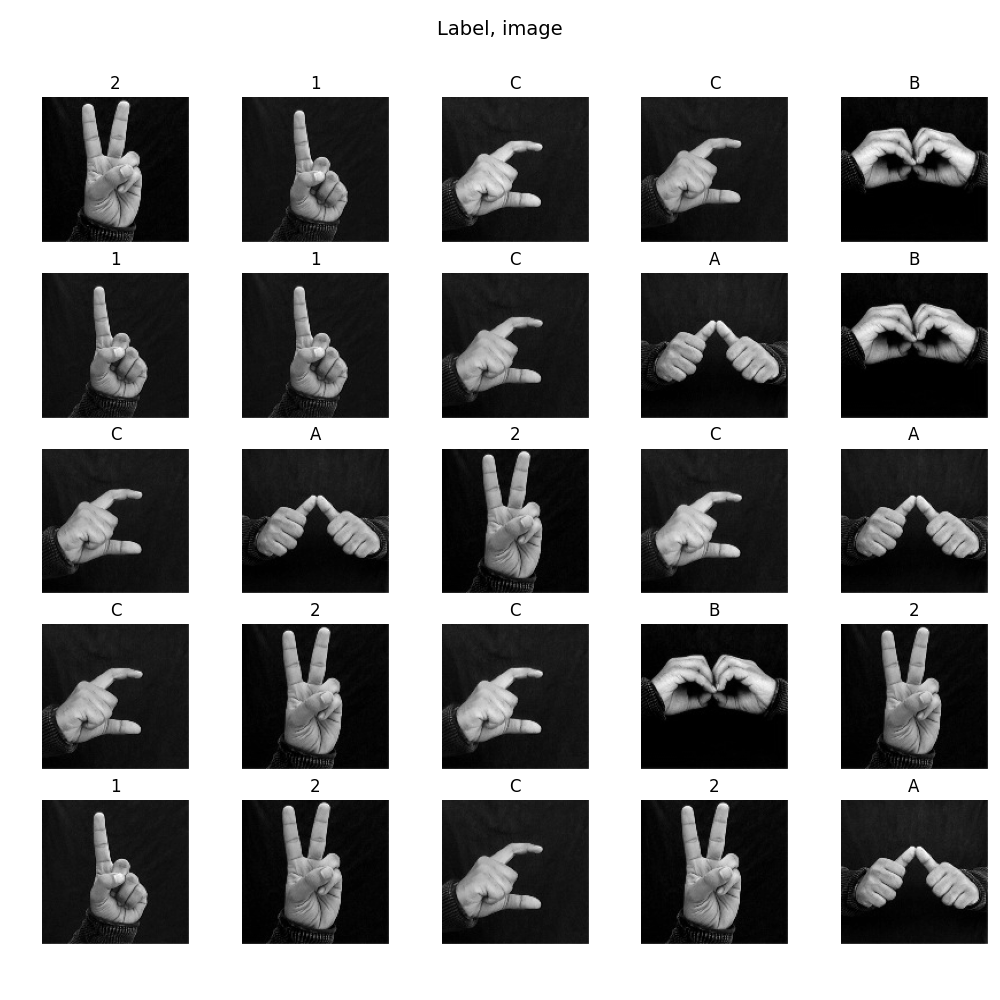

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

def random_dataset():
    m, n = images.shape

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]


    # fig.tight_layout(pad=0.5)
    # widgvis(fig)

    for i,ax in enumerate(axes.flat):
        # Select random indices
        random_index = np.random.randint(m)
        
        # Select rows corresponding to the random indices and
        # reshape the image
        image_random_reshaped = images[random_index].reshape((128,128))

        # Display the image
        ax.imshow(image_random_reshaped, cmap='gray', aspect='auto', extent=(20, 80, 20, 80),)

        # Display the label above the image
        ax.set_title(labels[random_index])
        ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)
    plt.show()


random_dataset()